
# Project: Investigate a Dataset- TMBD Movies

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

import pandas as pd
import numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as se


<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

df = pd.read_csv("tmdb-movies.csv")


**Now, let's try to understand the dataframe, shape and the types of columns:**

In [3]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [4]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [5]:
df.shape

(10866, 21)

In [6]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [7]:
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [8]:
#long films
df.sort_values(["runtime"], ascending = False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.000000e+00
4041,150004,tt0289830,0.469332,0,0,Taken,Dakota Fanning|Matt Frewer|Eric Close|Emily Be...,NaN,Breck Eisner|FÃ©lix EnrÃ­quez AlcalÃ¡|John Faw...,Some secrets we keep. Some are kept from us,...,"Taken spans five decades and four generations,...",877,Science Fiction,DreamWorks,12/2/02,38,6.8,2002,0.0,0.000000e+00
2722,331214,tt0185906,0.537593,0,125000000,Band of Brothers,Damian Lewis|Ron Livingston|Frank John Hughes|...,http://www.hbo.com/band-of-brothers,Phil Alden Robinson|Richard Loncraine|Mikael S...,Ordinary men. Extraordinary times.,...,Drawn from interviews with survivors of Easy C...,705,Action|Drama|War,HBO,9/9/01,313,8.0,2001,0.0,1.539360e+08
6176,42044,tt0090015,0.147489,0,0,Shoah,Simon Srebnik|Michael Podchlebnik|Motke Zaidl,NaN,Claude Lanzmann,NaN,...,Claude Lanzmann directed this 9 1/2 hour docum...,566,Documentary,British Broadcasting Corporation (BBC)|MinistÃ...,11/1/85,16,8.3,1985,0.0,0.000000e+00
6181,18729,tt0088583,0.000065,0,0,"North and South, Book I",Patrick Swayze|Philip Casnoff|Kirstie Alley|Ge...,NaN,NaN,NaN,...,"Two friends, one northern and one southern, st...",561,Drama|History|Western,NaN,11/3/85,17,6.0,1985,0.0,0.000000e+00


In [9]:
#short films
df.sort_values(["runtime"]).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
410,339342,tt2948712,0.097514,0,0,Anarchy Parlor,Robert LaSardo|Jordan James Smith|Sara Fabel|T...,NaN,Kenny Gage|Devon Downs,NaN,...,Six young college hopefuls vacationing and par...,0,Horror,NaN,1/1/15,15,5.6,2015,0.0,0.0
3857,289097,tt1288636,0.095583,0,0,Cell 213,Bruce Greenwood|Eric Balfour|Michael Rooker|De...,NaN,Stephen Kay,NaN,...,Cocky young attorney Michael Gray finds himsel...,0,Horror,Access Motion Pictures,6/10/11,13,5.2,2011,0.0,0.0
2370,127717,tt1525359,0.081892,0,0,Freshman Father,Britt Irvin|Merrilyn Gann|Barbara Tyson|Anthon...,NaN,Michael Scott,NaN,...,NaN,0,NaN,NaN,6/5/10,12,5.8,2010,0.0,0.0
2315,48373,tt1274296,0.171615,0,0,Listen to Your Heart,Alexia Rasmussen|Kent Moran|Cybill Shepherd|Sh...,http://www.listentoyourheartfilm.com/,NaN,One song can change your life.,...,Danny Foster doesn't have much: an apartment a...,0,Drama|Music|Romance,NaN,8/14/10,29,7.3,2010,0.0,0.0
3884,105885,tt1754944,0.045198,0,0,eCupid,Houston Rhines|Andy Anderson|John Callahan|Gal...,NaN,J.C. Calciano,NaN,...,From the director of Is It Just Me? comes this...,0,Romance,NaN,6/23/11,12,4.6,2011,0.0,0.0


In [10]:
#short films
df.sort_values(["vote_average"], ascending = False).head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3894,125336,tt2044056,0.006925,0,0,The Story of Film: An Odyssey,Mark Cousins|Jean-Michel Frodon|Cari Beauchamp...,http://www.channel4.com/programmes/the-story-o...,Mark Cousins,NaN,...,"The Story of Film: An Odyssey, written and dir...",900,Documentary,NaN,9/3/11,14,9.2,2011,0.0,0.0
538,224972,tt3983674,0.114264,0,0,The Mask You Live In,NaN,http://themaskyoulivein.org,Jennifer Siebel Newsom,"Is american masculinity harming our boys, men ...",...,"Compared to girls, research shows that boys in...",88,Documentary,NaN,1/1/15,11,8.9,2015,0.0,0.0
2269,51299,tt1828232,0.222293,0,0,Life Cycles,NaN,http://www.lifecyclesfilm.com/,Derek Frankowski,NaN,...,Life Cycles tells a spectacular story of the b...,47,Documentary,NaN,10/2/10,27,8.8,2010,0.0,0.0
1200,374430,tt3973198,0.129531,0,0,Black Mirror: White Christmas,Jon Hamm|Rafe Spall|Oona Chaplin|Natalia Tena|...,NaN,Carl Tibbetts,NaN,...,This feature-length special consists of three ...,74,Drama|Horror|Mystery|Science Fiction|Thriller,NaN,12/16/14,41,8.8,2014,0.0,0.0
6911,24970,tt0110758,0.212010,0,0,Pink Floyd: Pulse,David Gilmour|Nick Mason|Richard Wright|Sam Br...,NaN,David Mallet,NaN,...,Pulse (stylized as Pâ€¢Uâ€¢Lâ€¢Sâ€¢E) is a Pin...,145,Music,SMV Enterprises|Columbia Music Video|EMI,7/9/06,23,8.7,2006,0.0,0.0


**Now, we need to understand the features by making plots, histograms:**

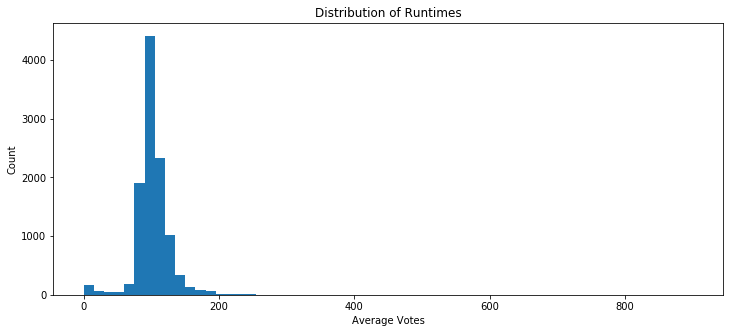

In [11]:
#the distribution of runtimes

#df.runtime.plot(kind = "hist", bins = 60, figsize = (12,5))

runtime = df["runtime"]
plt.figure(figsize=(12,5))
plt.hist(runtime, bins = 60)
plt.title("Distribution of Runtimes")
plt.xlabel("Average Votes")
plt.ylabel("Count")
plt.show()

Distribution of runtimes shows that films are dense around 100 minutes.

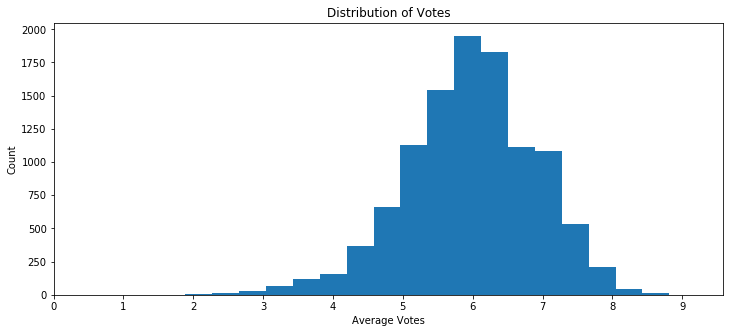

In [12]:
#This histogram shows the distribution of votes.
votes = df["vote_average"]

plt.figure(figsize=(12,5))
plt.hist(votes, bins = 20)
plt.xticks(range(10))
plt.title("Distribution of Votes")
plt.xlabel("Average Votes")
plt.ylabel("Count")
plt.show()

Distribution of votes show that the votes spread around ~2 and 9 and 6 point is the most given votes.

Text(0,0.5,'Average Votes')

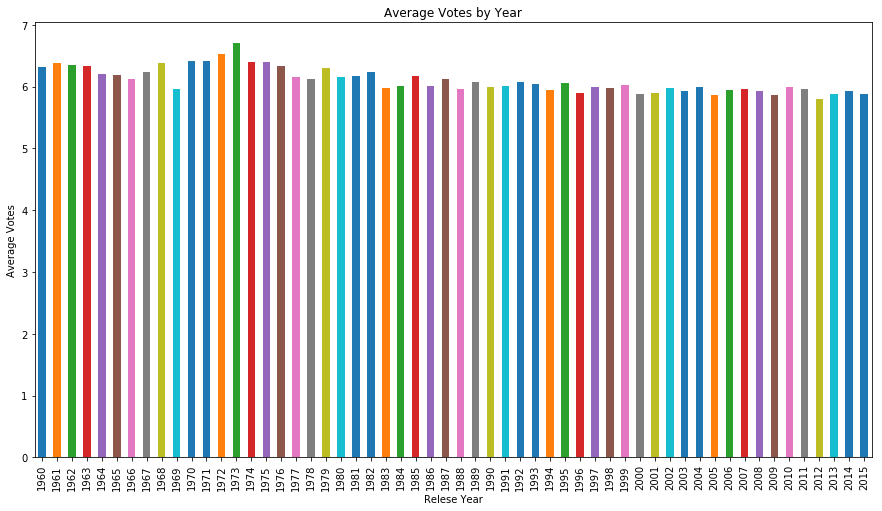

In [13]:
#Here I wonder if the votes increases by the year. 

chart = df.groupby("release_year").vote_average.mean().plot(kind="bar", figsize=(15,8), title = "Average Votes by Year")
chart.set_xlabel("Relese Year")
chart.set_ylabel("Average Votes")

The chart shows that votes does not increase by year.

Text(0.5,1,'Total number of films by year')

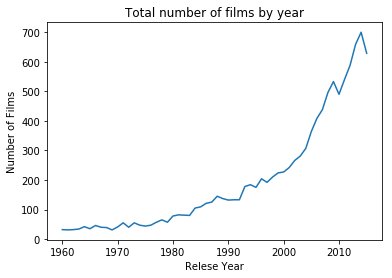

In [14]:
#Increase the total number of films by year
chart2 = df.release_year.value_counts().sort_index().plot()
chart2.set_xlabel("Relese Year")
chart2.set_ylabel("Number of Films")
chart2.set_title("Total number of films by year")


Total Number of films by year shows that there is a remarkable peak in 2000's.

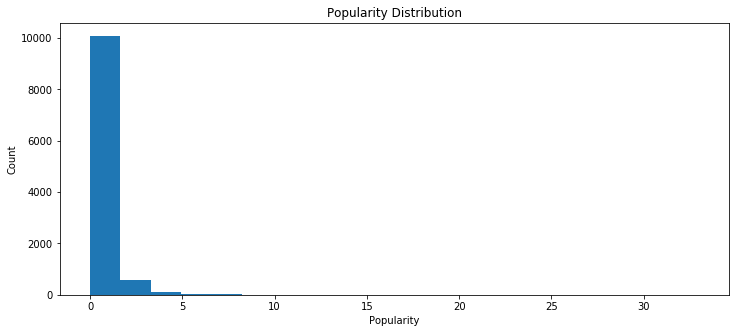

In [15]:
#This histogram shows the distribution of popularity.
pop = df["popularity"]

plt.figure(figsize=(12,5))
plt.hist(pop, bins = 20)
plt.xlabel("Popularity")
plt.ylabel("Count")
plt.title("Popularity Distribution")
plt.show()

Popularity distirbution shows that popularity is dense around 0-2

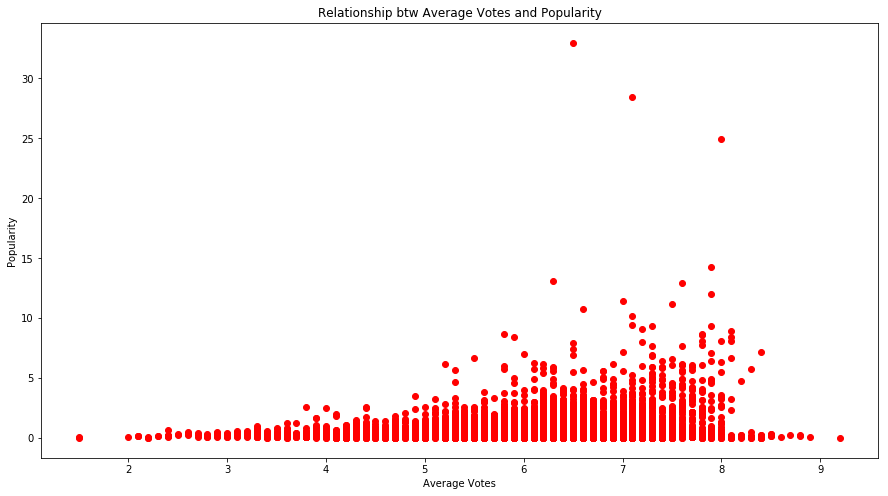

In [16]:
#Here I wonder if there is a correlation btw average votes and popularity
plt.figure(figsize=(15,8))
plt.plot(df.vote_average, df.popularity, 'ro')
plt.xlabel("Average Votes")
plt.ylabel("Popularity")
plt.title("Relationship btw Average Votes and Popularity")
plt.show()

Relationship shows that there is no correlation between average votes and popularity.

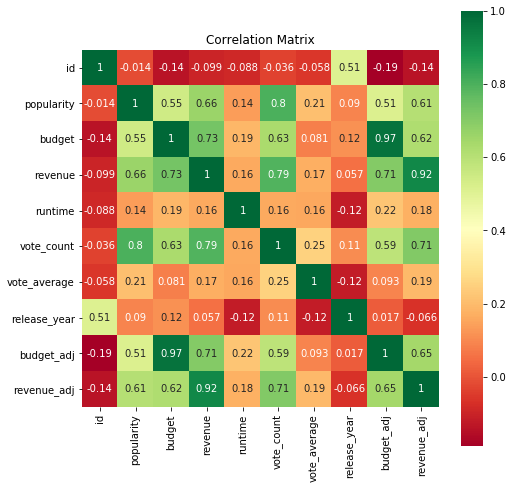

In [17]:
#Correaltion Matrix:

plt.figure(figsize=(8,8))
correlation_matrix = df.corr()
ax1 = se.heatmap(correlation_matrix, vmax=1, square=True,annot=True,cmap='RdYlGn')
ax1.set_title("Correlation Matrix")
plt.show()

Here, the remarkable conclusions could be made from the graph above:
- Popularity and revenue correlation is 0.66. 
- Budget and revenue are 0.73 correlated. 
- Revenue and vote count are 0.79 correlated. 

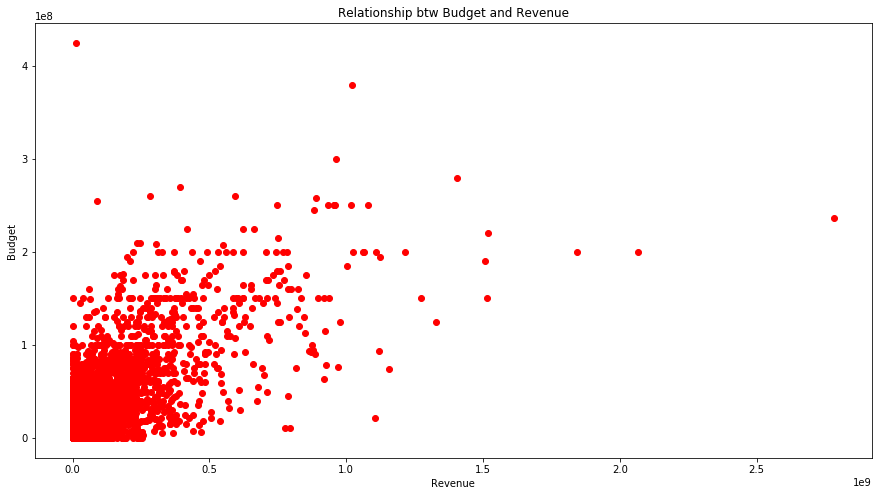

In [18]:
#Here I want to see the distribution of revenue and budget. 
plt.figure(figsize=(15,8))
plt.plot(df.revenue, df.budget, 'ro')
plt.xlabel("Revenue")
plt.ylabel("Budget")
plt.title("Relationship btw Budget and Revenue")
plt.show()

As it is seen from the graph there are too many values as 0.


### Data Cleaning - Filling null values and adding new columns for further analysis

**Data Cleaning**

In [19]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

Before handling the null values, 0 datas in budget and revenue could be considered. If both of them are 0 then whole analysis could be wrong. The first thing to do is get rid of them.


In [20]:
print(df[df["revenue"] == 0].shape)
print(df[df["budget"] == 0].shape)

(6016, 21)
(5696, 21)


In [21]:
df = df[(df["budget"] !=0) & (df["revenue"] != 0)]

After I delete the raws I want to reexplore the data:

In [22]:
df.shape

(3855, 21)

In [23]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3855.000000,3855.000000,3.855000e+03,3.855000e+03,3855.000000,3855.000000,3855.00000,3855.000000,3.855000e+03,3.855000e+03
mean,39888.783398,1.191400,3.720183e+07,1.076589e+08,109.215824,527.611933,6.16786,2001.263294,4.423630e+07,1.370294e+08
std,67213.815955,1.475002,4.220291e+07,1.765248e+08,19.922166,879.868374,0.79504,11.281989,4.480403e+07,2.160944e+08
min,5.000000,0.001117,1.000000e+00,2.000000e+00,15.000000,10.000000,2.20000,1960.000000,9.693980e-01,2.370705e+00
25%,6074.000000,0.462448,1.000000e+07,1.357645e+07,95.000000,71.000000,5.70000,1995.000000,1.309053e+07,1.834123e+07
50%,11322.000000,0.797298,2.400000e+07,4.479322e+07,106.000000,204.000000,6.20000,2004.000000,3.001558e+07,6.171861e+07
75%,38577.000000,1.368245,5.000000e+07,1.241530e+08,119.000000,580.000000,6.70000,2010.000000,6.061307e+07,1.632401e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.40000,2015.000000,4.250000e+08,2.827124e+09


**Null Values**

In [24]:
df.isnull().sum()

id                         0
imdb_id                    0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                       4
homepage                2429
director                   1
tagline                  280
keywords                 138
overview                   0
runtime                    0
genres                     0
production_companies      46
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

As seen in the null counts table, homepage is %30 null. If I fill them like genres it will be bias. That's why I delete the column. Moreover, In my exploration keyword, tagline are hard to define and explore, I delete the column.

In [25]:
df.drop(["homepage"], axis = 1, inplace = True)

In [26]:
df.drop(["keywords"], axis = 1, inplace = True)

In [27]:
df.drop(["tagline"], axis = 1, inplace = True)

I will fill the director name as Unknown, cast as UnknownCast and I drop the columns: keywords, tagline and imdb_id since I will not use them in my exploration.

In [28]:
df.cast.fillna(value = "UnknownCast", inplace = True)

In [29]:
df.director.fillna(value = "Unknown", inplace = True)

In [30]:
df.isnull().sum()

id                       0
imdb_id                  0
popularity               0
budget                   0
revenue                  0
original_title           0
cast                     0
director                 0
overview                 0
runtime                  0
genres                   0
production_companies    46
release_date             0
vote_count               0
vote_average             0
release_year             0
budget_adj               0
revenue_adj              0
dtype: int64

**The only null values are in production companies**

In [31]:
df.production_companies.head()

0    Universal Studios|Amblin Entertainment|Legenda...
1    Village Roadshow Pictures|Kennedy Miller Produ...
2    Summit Entertainment|Mandeville Films|Red Wago...
3            Lucasfilm|Truenorth Productions|Bad Robot
4    Universal Pictures|Original Film|Media Rights ...
Name: production_companies, dtype: object

In [32]:
df["production_companies"].isnull().sum()

46

In [33]:
df.loc[df["production_companies"].isnull(), "release_year"].value_counts()

2008    5
2007    5
2004    5
2009    4
2005    4
2011    3
2001    3
1995    2
2000    2
1998    2
1996    2
2013    1
1988    1
1990    1
1994    1
2002    1
2012    1
2006    1
2010    1
1986    1
Name: release_year, dtype: int64

**There is no relationship between null production companies and release date.**

**I decide to use the relationship between genres and production companies.**

**Genres is important factor to make analysis and fill the production company names.**

In [34]:
df.genres.head()

0    Action|Adventure|Science Fiction|Thriller
1    Action|Adventure|Science Fiction|Thriller
2           Adventure|Science Fiction|Thriller
3     Action|Adventure|Science Fiction|Fantasy
4                        Action|Crime|Thriller
Name: genres, dtype: object

I select the first element as new_genre to fill the related production companies and for further analysis:

In [35]:
def get_element(my_list, position):
    return my_list[position]

In [36]:
df.genres.str.split('|').apply(get_element, position=0).head()

#other way: df.genres.str.split("|").apply(lambda x: x[0]).head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genres, dtype: object

In [37]:
df["new_genres"] = df.genres.str.split('|').apply(get_element, position=0)

In [38]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action


Text(0,0.5,'Count')

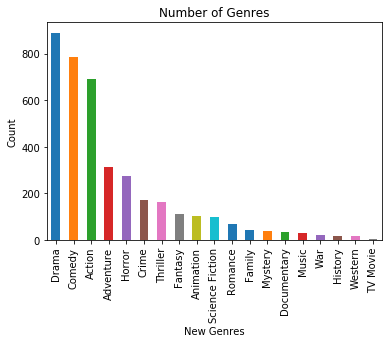

In [39]:
genres_chart = df["new_genres"].value_counts().plot(kind="bar")
genres_chart.set_title("Number of Genres")
genres_chart.set_xlabel("New Genres")
genres_chart.set_ylabel("Count")

**Cont' to fill the production companies:**

For each genre I will find the number of production companies and choose the maximum of them, then assign it to null prodcution companies for related genre.

In [40]:
#Lets check out the null values genres.

df.loc[df["production_companies"].isnull(), "new_genres"].value_counts()

Drama          13
Comedy         12
Documentary     7
Action          5
Horror          3
Animation       2
Adventure       2
Fantasy         1
Romance         1
Name: new_genres, dtype: int64

In [41]:
#replace the null values with other

df.production_companies.fillna(value = "Other", inplace = True)

df[df["production_companies"]== "Other"].shape

(46, 19)

In [42]:
#I use the first part of production companies, I split them and get the first element. I define a new column as new_prod_com

df["new_prod_com"] = df.production_companies.str.split("|").apply(get_element, position=0)

In [43]:
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres,new_prod_com
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Village Roadshow Pictures


In [44]:
#Lets look at the number of production companies

df["new_prod_com"].value_counts().head()

Universal Pictures                        283
Paramount Pictures                        266
Columbia Pictures                         177
Twentieth Century Fox Film Corporation    164
New Line Cinema                           144
Name: new_prod_com, dtype: int64

In [45]:
#Lets explore their genres

df[df["new_prod_com"] == "Universal Pictures"].new_genres.value_counts().head()

Action       66
Comedy       60
Drama        44
Adventure    30
Horror       27
Name: new_genres, dtype: int64

In [46]:
#Lets explore their genres

df[df["new_prod_com"] == "Paramount Pictures"].new_genres.value_counts().head()

Action       55
Comedy       55
Drama        50
Adventure    21
Crime        18
Name: new_genres, dtype: int64

In [47]:
#I need to find the maximum film maker on the basis of genres

count_series = df.groupby(['new_genres', 'new_prod_com']).size()

In [48]:
#I define a new dataframe which shows the counts on the basis of genres

new_df = count_series.to_frame(name = 'size').reset_index()
new_df.rename(columns = {'size': 'count_of_com'}, inplace = True)
new_df = new_df[new_df.new_prod_com != 'Other']
new_df.head()

,new_genres,new_prod_com,count_of_com
0,Action,1818,1
1,Action,20th Century Fox,8
2,Action,40 Acres & A Mule Filmworks,1
3,Action,ABS-CBN Film Productions,1
4,Action,Alcon Entertainment,1


In [49]:
#Sorted values gives sense :)

new_df.sort_values("count_of_com", ascending=False).head(20)

,new_genres,new_prod_com,count_of_com
208,Action,Universal Pictures,66
606,Comedy,Universal Pictures,60
148,Action,Paramount Pictures,55
543,Comedy,Paramount Pictures,55
969,Drama,Paramount Pictures,50
203,Action,Twentieth Century Fox Film Corporation,46
1061,Drama,Universal Pictures,44
409,Comedy,Columbia Pictures,40
38,Action,Columbia Pictures,40
600,Comedy,Twentieth Century Fox Film Corporation,39


In [50]:
#I filter the maximum numbers ont he basis of genres

idx = new_df.groupby(['new_genres'])['count_of_com'].transform(max) == new_df['count_of_com']
final_df = new_df[idx]
final_df.sort_values("count_of_com", ascending=False)

,new_genres,new_prod_com,count_of_com
208,Action,Universal Pictures,66
606,Comedy,Universal Pictures,60
969,Drama,Paramount Pictures,50
361,Animation,Walt Disney Pictures,31
313,Adventure,Universal Pictures,30
1313,Horror,Universal Pictures,27
1267,Horror,New Line Cinema,27
684,Crime,Paramount Pictures,18
1448,Science Fiction,Paramount Pictures,16
1535,Thriller,Paramount Pictures,15


In [51]:
cond_com = (df["new_genres"] == "Comedy") & (df["new_prod_com"] == "Other")

cond_ac = (df["new_genres"] == "Action") & (df["new_prod_com"] == "Other")

cond_dr = (df["new_genres"] == "Drama") & (df["new_prod_com"] == "Other")

cond_hor = (df["new_genres"] == "Horror") & (df["new_prod_com"] == "Other")

cond_anime = (df["new_genres"] == "Animation") & (df["new_prod_com"] == "Other")

cond_ad = (df["new_genres"] == "Adventure") & (df["new_prod_com"] == "Other")

In [52]:
#here I change the name Other with the maximum numbers according to the conditions. 

df.loc[cond_com, "new_prod_com"] = "Universal Pictures"

df.loc[cond_ac, "new_prod_com"] = "Universal Pictures"

df.loc[cond_dr, "new_prod_com"] = "Paramount Pictures"

df.loc[cond_hor, "new_prod_com"] = "New Line Cinema"

df.loc[cond_anime, "new_prod_com"] = "Walt Disney Pictures"

df.loc[cond_ad, "new_prod_com"] = "Universal Pictures	"

In [53]:
#lets look at how many rows are others:

df[df["new_prod_com"]== "Other"].new_genres.value_counts()

Documentary    7
Fantasy        1
Romance        1
Name: new_genres, dtype: int64

**So far, I filled almost 37 null production companies. The rest of them is really small counts and I dont want to fill them. The rest of them can be remain as other.**

In [54]:
df.isnull().sum()

id                      0
imdb_id                 0
popularity              0
budget                  0
revenue                 0
original_title          0
cast                    0
director                0
overview                0
runtime                 0
genres                  0
production_companies    0
release_date            0
vote_count              0
vote_average            0
release_year            0
budget_adj              0
revenue_adj             0
new_genres              0
new_prod_com            0
dtype: int64

In [55]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres,new_prod_com
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Village Roadshow Pictures
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Summit Entertainment
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Lucasfilm
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Universal Pictures


<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 - Which genres are most popular from year to year?

In [56]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'new_genres',
       'new_prod_com'],
      dtype='object')

In [57]:
#most popular genre for each year:

#first, mean popularity for each genre is accounted for each year.
mean_genres = df.groupby(['release_year', 'new_genres']).popularity.mean()
mean_genres.head(10)

release_year  new_genres
1960          Action        1.504538
              Comedy        0.501564
              Drama         2.610362
1961          Action        0.754548
              Adventure     2.631987
              Comedy        0.782032
              Drama         0.410515
              Horror        0.249542
              Music         0.900245
              Western       0.173731
Name: popularity, dtype: float64

In [58]:
#the dataframe:

df_mean = mean_genres.to_frame(name = 'pop').reset_index()
df_mean.head()

,release_year,new_genres,pop
0,1960,Action,1.504538
1,1960,Comedy,0.501564
2,1960,Drama,2.610362
3,1961,Action,0.754548
4,1961,Adventure,2.631987


In [73]:
#calculate the most popular genre for each year:

idx = df_mean.groupby(['release_year'])['pop'].transform(max) == df_mean['pop']
df_mean_final = df_mean[idx]
df_mean_final

,release_year,new_genres,pop
2,1960,Drama,2.610362
4,1961,Adventure,2.631987
10,1962,Adventure,2.169709
14,1963,Action,1.357698
19,1964,Adventure,3.153791
24,1965,Adventure,1.910465
28,1966,Drama,0.670274
34,1967,Family,2.550704
40,1968,Science Fiction,3.309196
45,1969,History,1.357317


Text(0,0.5,'Popularity')

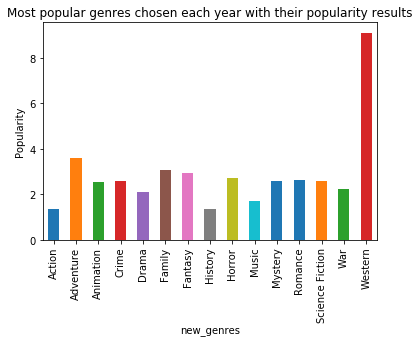

In [60]:
#this graph show the average popularity for the most popular genres chosen for each year:

#western is the most popular of all times although it is chosen only twice. 
#In 2015 the popularity is 9.1 which is higher than  the average.
#Adventure\ family and Fantasy are also popular.

chart_pop = df_mean_final.groupby(["new_genres"]).pop.mean().plot(kind="bar")
chart_pop.set_title("Most popular genres chosen each year with their popularity results")
chart_pop.set_ylabel("Popularity")


Text(0,0.5,'Count')

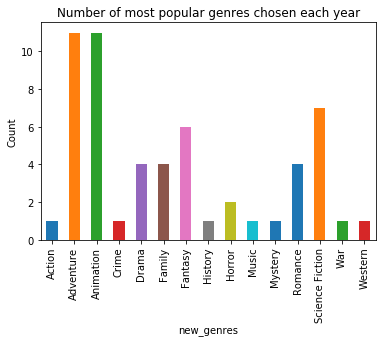

In [61]:
#this graph shows the number of genres chosen as most popular for each year:
#Adventure& Animation is selected the most between 1960 - 2015

chart_count = df_mean_final.groupby(["new_genres"]).size().plot(kind= "bar")
chart_count.set_title("Number of most popular genres chosen each year")
chart_count.set_ylabel("Count")


Now I want to show more spesific graph. User can search any genre to find out its year by year popularity:

Please enter the name of the genre: family


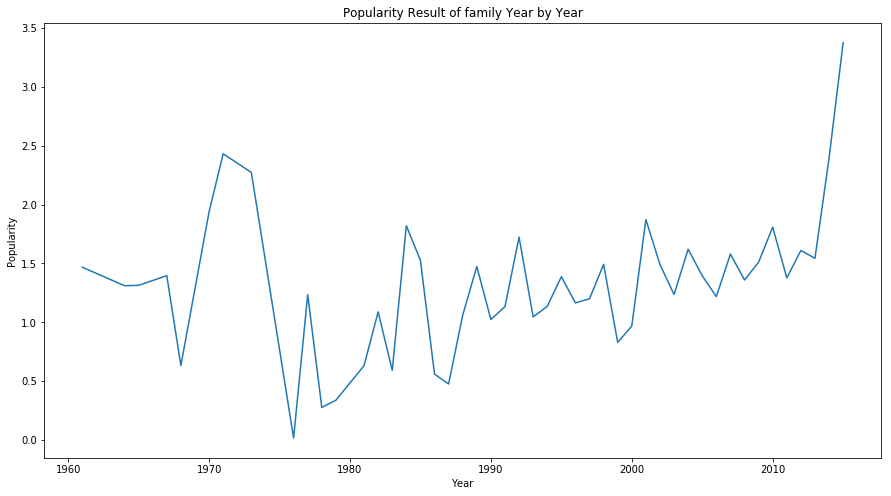

In [80]:
genre_name=input("Please enter the name of the genre: ")

df1 = df[df.genres.str.lower().str.contains(genre_name.lower())]

mean_pop = df1.groupby(['release_year']).popularity.mean()

df1_year = mean_pop.to_frame(name = 'popularity').reset_index()
df1_year

plt.figure(figsize=(15,8))
plt.plot(df1_year.release_year, df1_year.popularity)
plt.title("Popularity Result of " + genre_name + " Year by Year")
plt.xlabel("Year")
plt.ylabel("Popularity")
plt.show()

- Drama: Peak in 1970's, also popular in 2010's.
- Comedy: Is more popular in 2010's. Interestingly it is not popular before:)
- Action: End of 1970's and middle of 1960-1970 action films are popular and after 2010 it is more and more popular. May be it is related with technoology and budget. 
- Crime: After 1970's and before 2000's its popularity increases. And now it is more popular.
- Western: Until 2010's western films are not popular at all.
- Fantasy: has a continuous improvement on popularity.
- Family: it seems that there is a seasonality in famliy films. 


### Research Question 2  Which production company get more revenue on average?

In [63]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'director', 'overview', 'runtime', 'genres',
       'production_companies', 'release_date', 'vote_count', 'vote_average',
       'release_year', 'budget_adj', 'revenue_adj', 'new_genres',
       'new_prod_com'],
      dtype='object')

In [64]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.

df[["new_prod_com", "revenue", "budget"]].head()

,new_prod_com,revenue,budget
0,Universal Studios,1513528810,150000000
1,Village Roadshow Pictures,378436354,150000000
2,Summit Entertainment,295238201,110000000
3,Lucasfilm,2068178225,200000000
4,Universal Pictures,1506249360,190000000


In [65]:
#I divide revenue by 1000.000 to show the numbers clearly:
(df["revenue"])/1000000

0        1513.528810
1         378.436354
2         295.238201
3        2068.178225
4        1506.249360
5         532.950503
6         440.603537
7         595.380321
8        1156.730962
9         853.708609
10        880.674609
11        183.987723
12         36.869414
13        243.637091
14       1405.035767
15        155.760117
16        325.771424
17        518.602163
18        542.351353
19        650.523427
20        209.035668
21         91.709827
22        470.490832
23        569.651467
24        133.346506
25        682.330139
26        215.863606
27        403.802136
28         88.346473
29        311.256926
            ...     
10690     163.214286
10691     111.721910
10692      29.950000
10716      12.000000
10724      81.974493
10725     102.308889
10727      44.785053
10728       0.638641
10755     181.813770
10756     187.884007
10757      55.000000
10758     300.218018
10759      70.000000
10760     141.000000
10762      50.000000
10770      35.000000
10771      30

In [66]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,new_genres,new_prod_com
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,Action,Universal Studios
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,Action,Village Roadshow Pictures
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,Adventure,Summit Entertainment
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,Action,Lucasfilm
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,Action,Universal Pictures


In [67]:
#shows yearly revenue earned by each production company:

prod_com_marge = df.groupby(['release_year', 'new_prod_com']).revenue.mean()
prod_com_marge.head(10)

df_margin = prod_com_marge.to_frame(name = 'revenue').reset_index()
df_margin.head()

,release_year,new_prod_com,revenue
0,1960,Bryna Productions,60000000.0
1,1960,Paramount Pictures,7100000.0
2,1960,Shamley Productions,32000000.0
3,1960,The Mirisch Corporation,4905000.0
4,1960,United Artists,25000000.0


In [68]:
#shows the maximum revenue earned:
idx2 = df_margin.groupby(['release_year'])['revenue'].transform(max) == df_margin['revenue']
df_margin_final = df_margin[idx2]
df_margin_final.head()

,release_year,new_prod_com,revenue
0,1960,Bryna Productions,60000000.0
13,1961,Walt Disney Productions,215880014.0
15,1962,Horizon Pictures (II),70000000.0
23,1963,Eon Productions,78898765.0
27,1964,Eon Productions,124900000.0


Text(0,0.5,'Average Revenue (Million)')

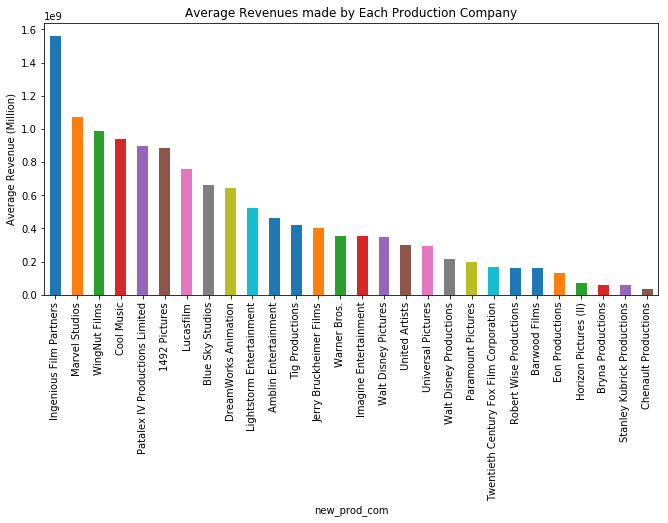

In [72]:
#this graph shows the mean of the revenues made by winner production company each year:
rev = df_margin_final.groupby(["new_prod_com"]).revenue.mean().sort_values(ascending=False).plot(kind="bar", figsize = (11,5))
rev.set_title("Average Revenues made by Each Production Company")
rev.set_ylabel("Average Revenue (Million)")

I saw lots of times the name of Universal Pictures but in this graph, Universal Pictures' average revenue is low. The best company n average is Ingenious Film Partners.

<a id='conclusions'></a>
## Conclusions

In this project, I first explore the data with various types of graphs such as distributions of the data
and corrrelateions btw them.

Secondly, I deleted the raws which are 0 in bugdet and revenue.

Thirdly, I filled the missing values. Here, you may find the techniques I've used:

- Drop the entire column (for homepage, key words, tagline)
- Fill the values with another type of class suchs as "Unknown Cast" (for Cast, Director)
- Fill the values with their most common value (for production company)

For further explorations I create another columns as new_genres which is also used for filling the missing values in production companies.

Finally I made two analysis about genres and production companies. 

The first one shows the year by year popularity of each genre. First, I tried to understand popular genres (I used new_genres column) each year and collect their popularity result. I also count them to understand which genre was chosen more times as the most popular. But these graphs don't give the exact picture. Then I made another graph. I use the whole genres column thşs time. You can search it by yourself by writing the name of the genre and follow the popularity change each year. 

Second analysis is about the revenue of each production company. I collected the mean of revenue for each company and sort them as you can see above. 


**Limitations:**

The zero values for budget and revenue decrease the data set which makes the analysis limited. The first data includes almost 10 thousand data and it is important to have more data to use them in modeling. Full budget and revenue data permit more general results about film's popularity, production companies, etc. I'm skeptical about the results due to the lack of budget and revenue information. The other limitation comes from the categoric null values. Whole columns are precious, however it is hard to fill them. Also, country information could have been better. Country - genres relationship could have given interesting results.


